In [4]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv('./train.csv')
print(train.shape)
train

(1095, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,382,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


# Data analysis
## 1. Check missing value

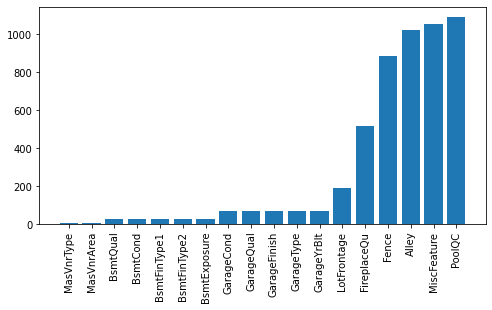

In [6]:
# 觀察缺失值狀況
# 有許多特徵的缺失值數量已經超過了資料總數的一半，但缺失值有時候其意義不單單只是缺失，也代表某些意義. (row, column)
missing = train.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 2. Check the probability distribution of the target - SalePrice

c:\users\johnma\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\johnma\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


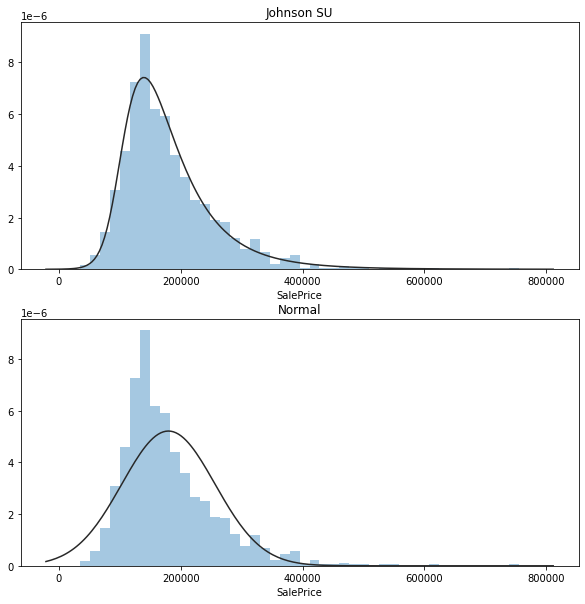

In [7]:
# 可以發現預測目標並不符合常態分佈
y = train['SalePrice']
JS = stats.johnsonsu.fit
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1, title = 'Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.subplot(2, 1, 2, title = 'Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.show()

## 3. Check the type of features(continual or discrete)

In [8]:
# 判斷每個特徵的類型
continual = [f for f in train.columns if train.dtypes[f] != 'object']
continual.remove('SalePrice')
continual.remove('Id')
discrete = [f for f in train.columns if train.dtypes[f] == 'object']

print(f'continual: {len(continual)}, discrete: {len(discrete)}')

continual: 36, discrete: 43


In [9]:
def plot_xy(x, y, x_label, y_label, fontsize = 12):
    plt.scatter(x, y)
    plt.ylabel(y_label, fontsize = fontsize)
    plt.xlabel(x_label, fontsize = fontsize)

y = train['SalePrice']
y_label = 'SalePrice'

## 3-1-1. Analyze continual features

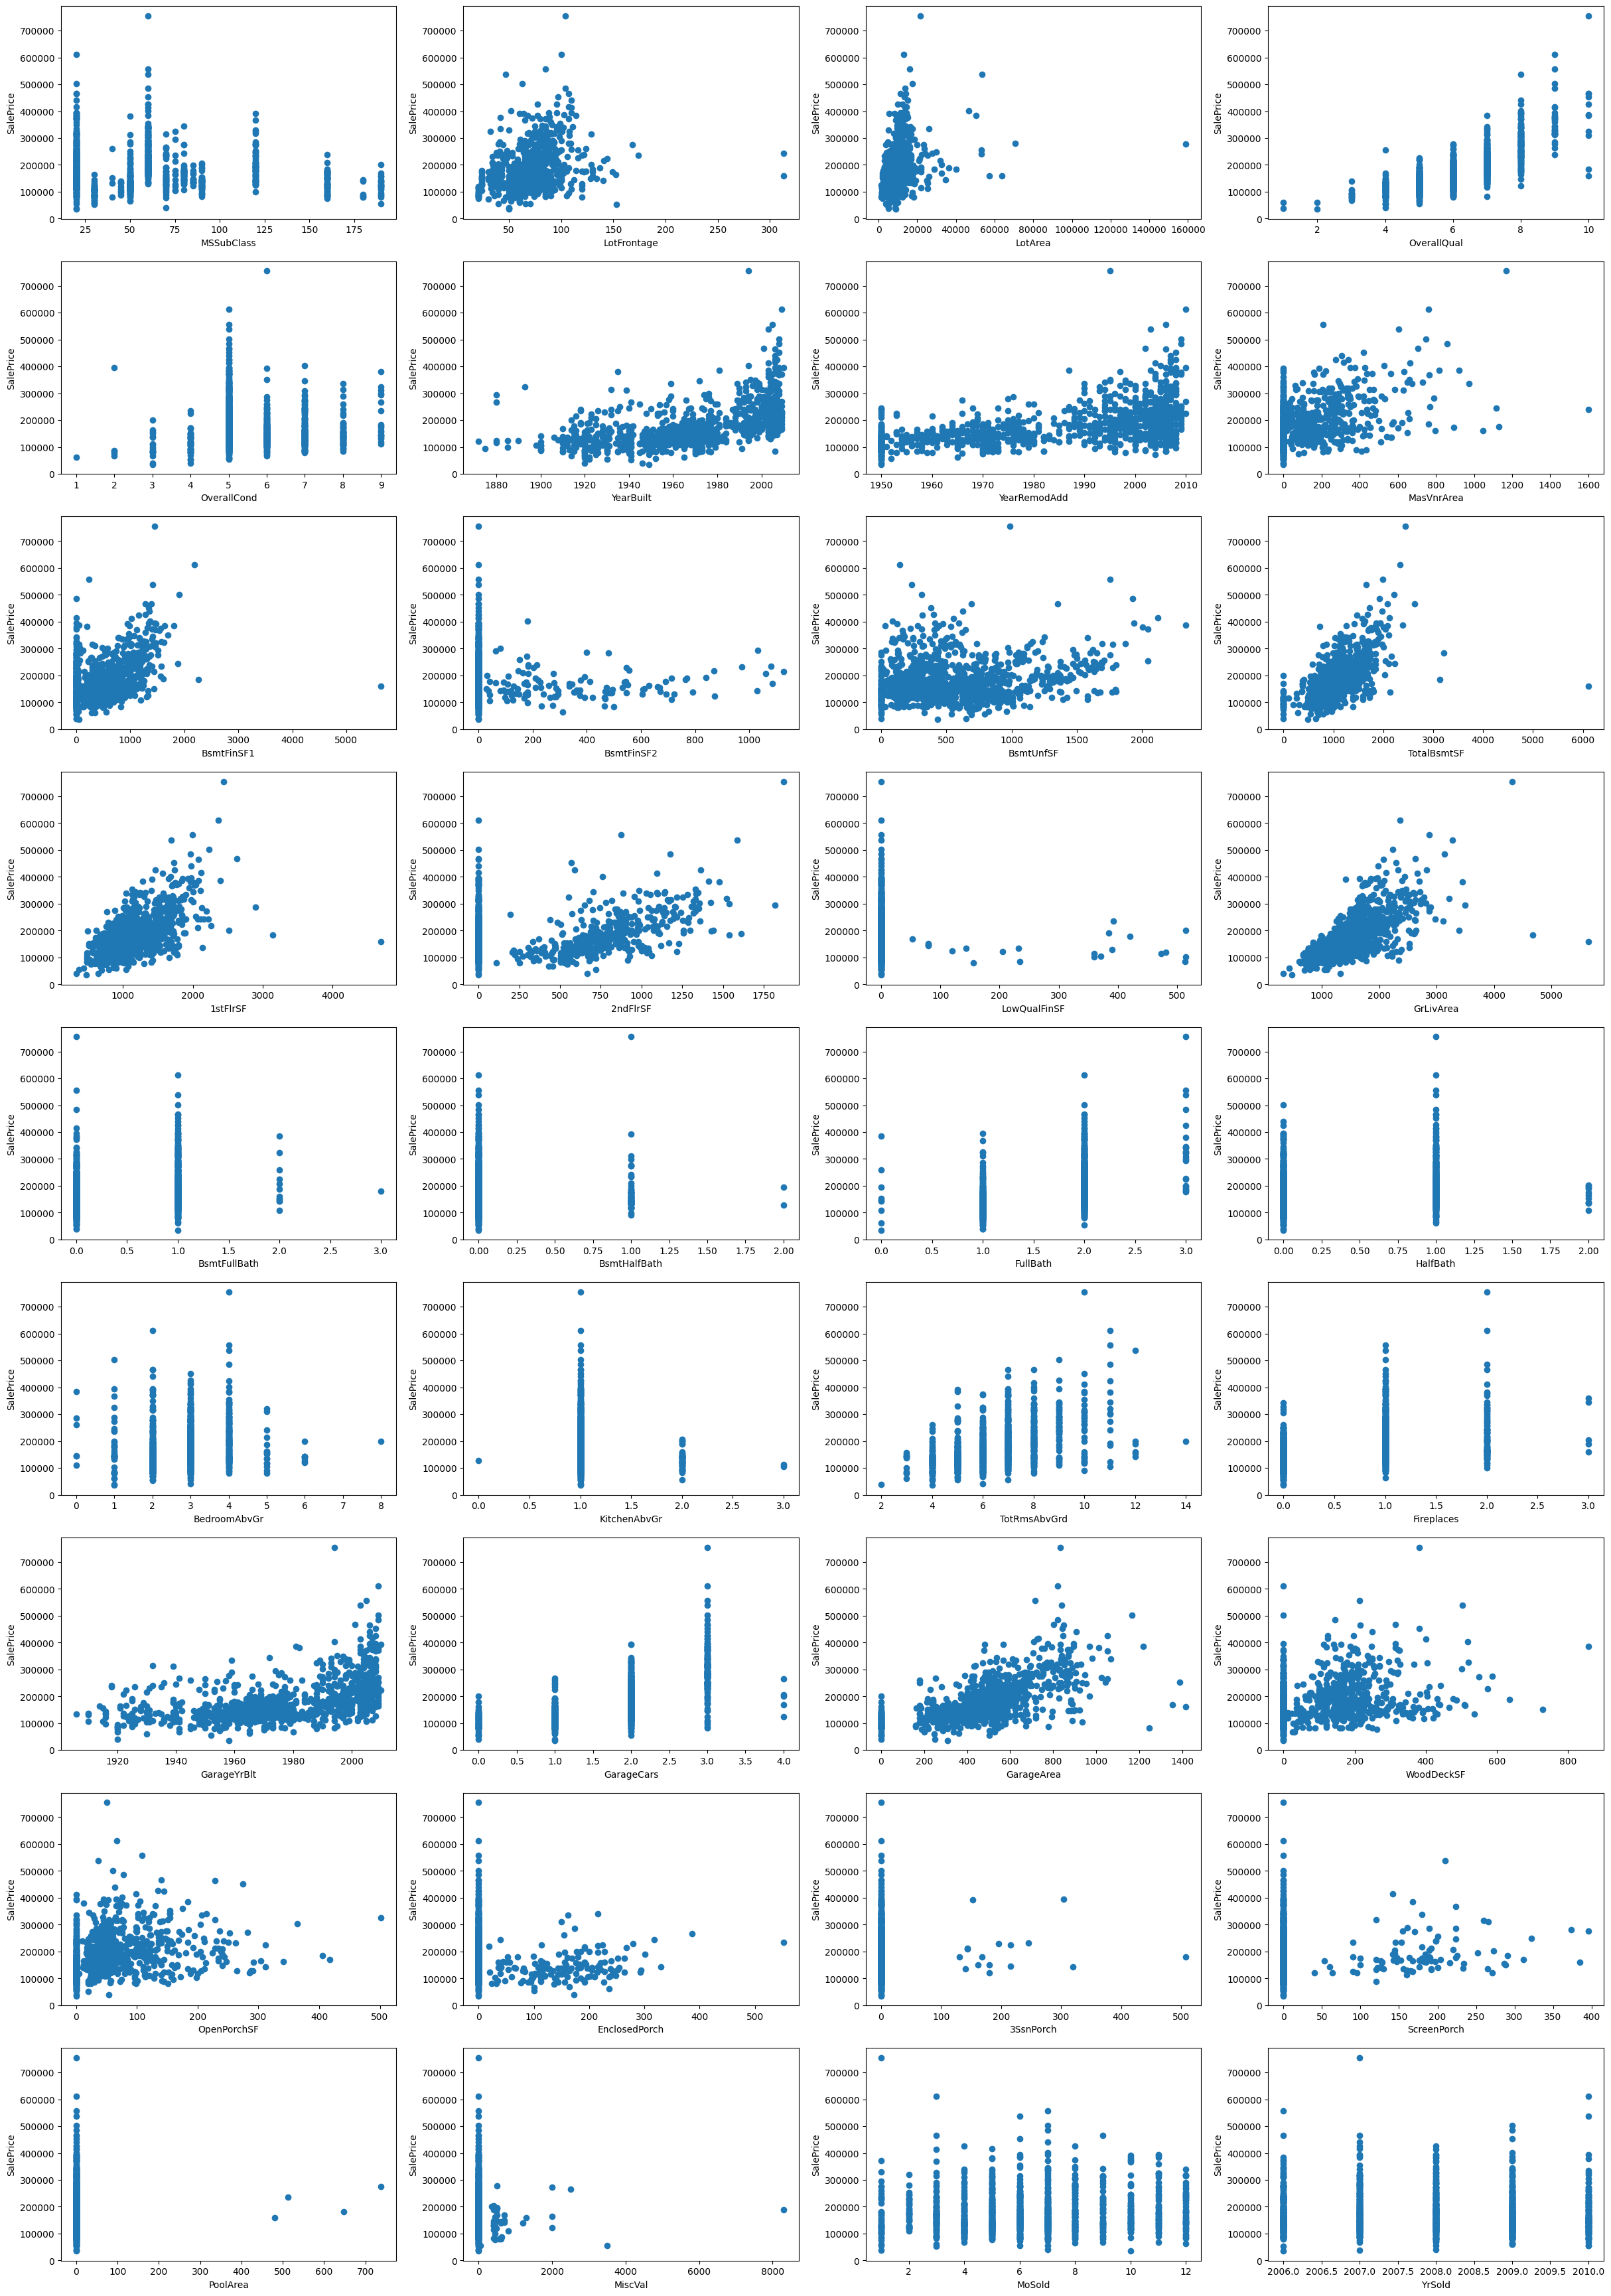

In [10]:
plt.figure(figsize = (30, 45), dpi = 100)
for i, feature in enumerate(continual):
    x_label = feature
    plt.subplot(9, 4, i + 1)
    plot_xy(train[x_label], y, x_label = x_label, y_label = y_label, fontsize = 10)

plt.show()

## 3-1-2. Spearman correlation and null hypothesis

In [11]:
features = continual + ['SalePrice']
corr, p_val = stats.spearmanr(train[features], nan_policy = 'omit')

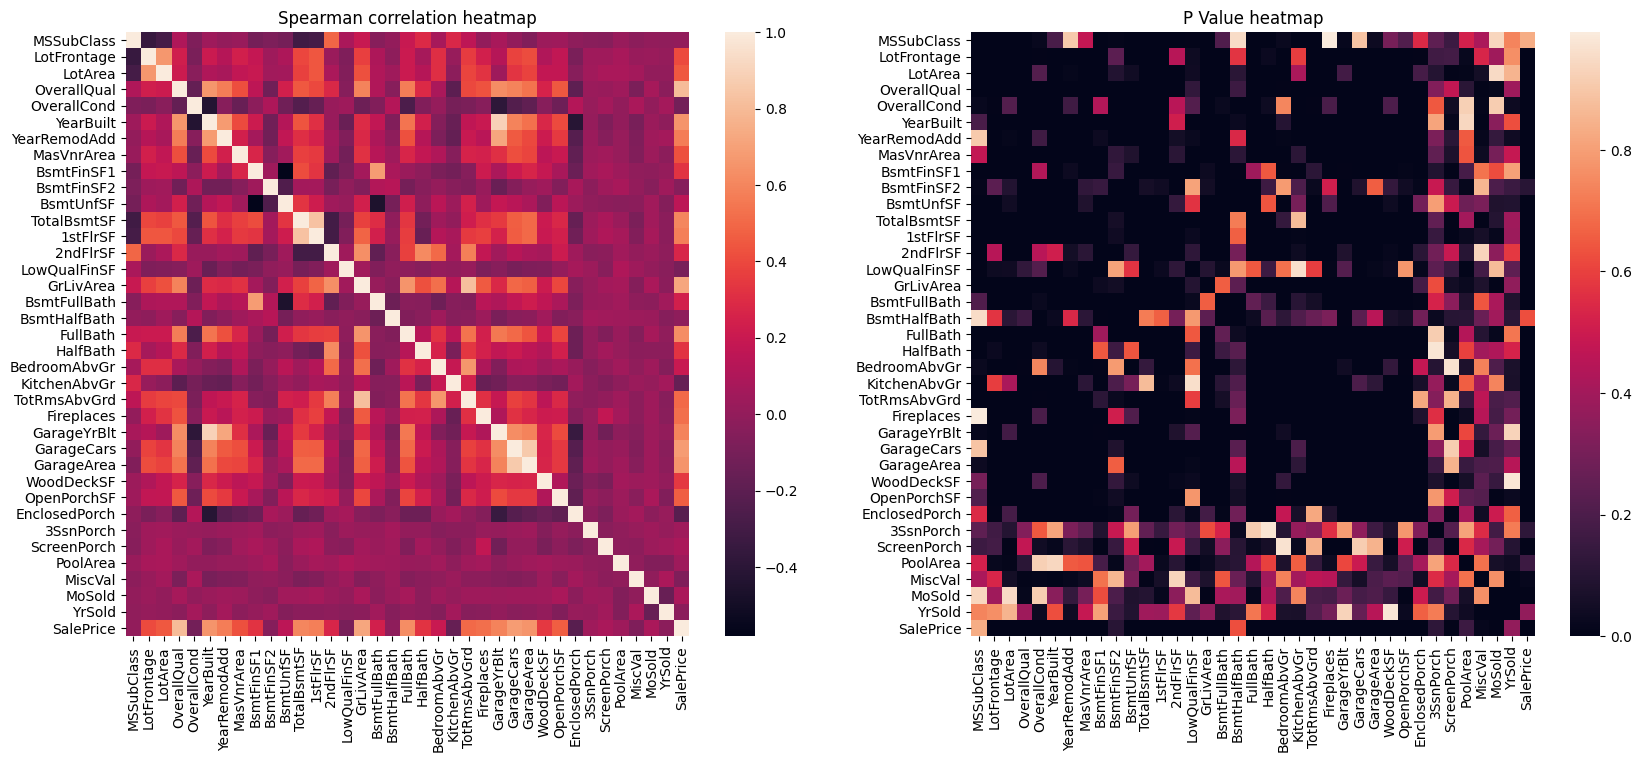

In [16]:
plt.figure(figsize = (20, 8), dpi = 100)

plt.subplot(1, 2, 1)
plt.title('Spearman correlation heatmap')
sns.heatmap(corr, xticklabels = features, yticklabels = features)

plt.subplot(1, 2, 2)
plt.title('P Value heatmap')
sns.heatmap(p_val, xticklabels = features, yticklabels = features)

plt.show()

## 3-2-1. Analyze discrete features by histogram

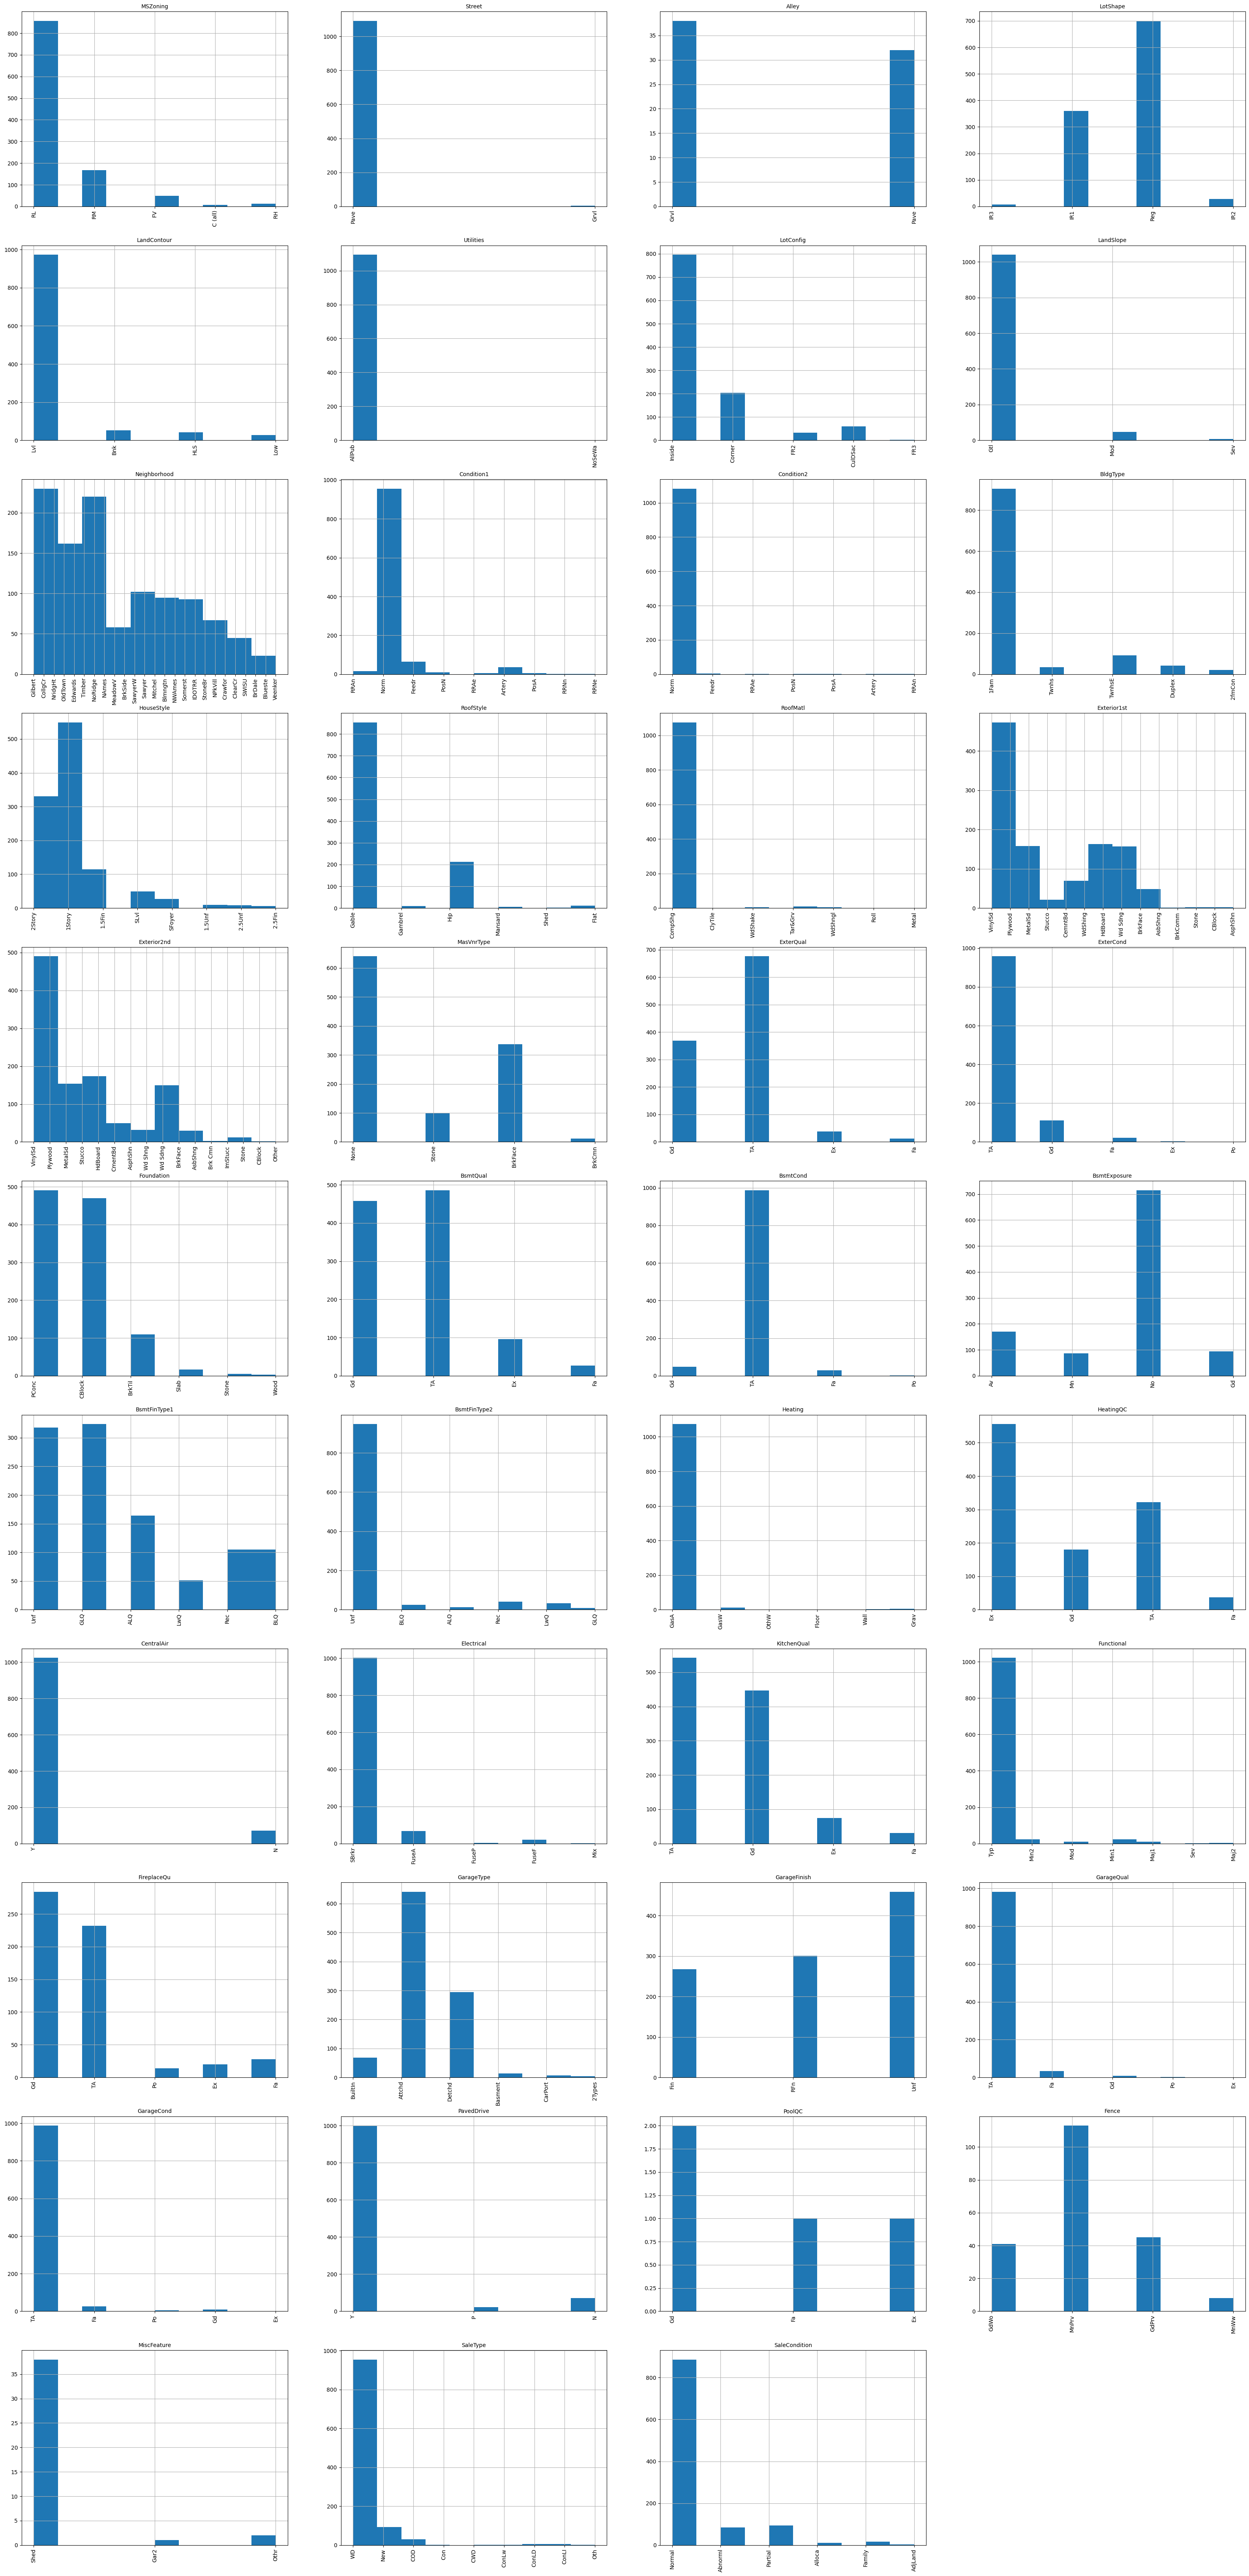

In [13]:
plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    train[feature].hist()
    plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()

## 3-2-2. Analyze discrete features

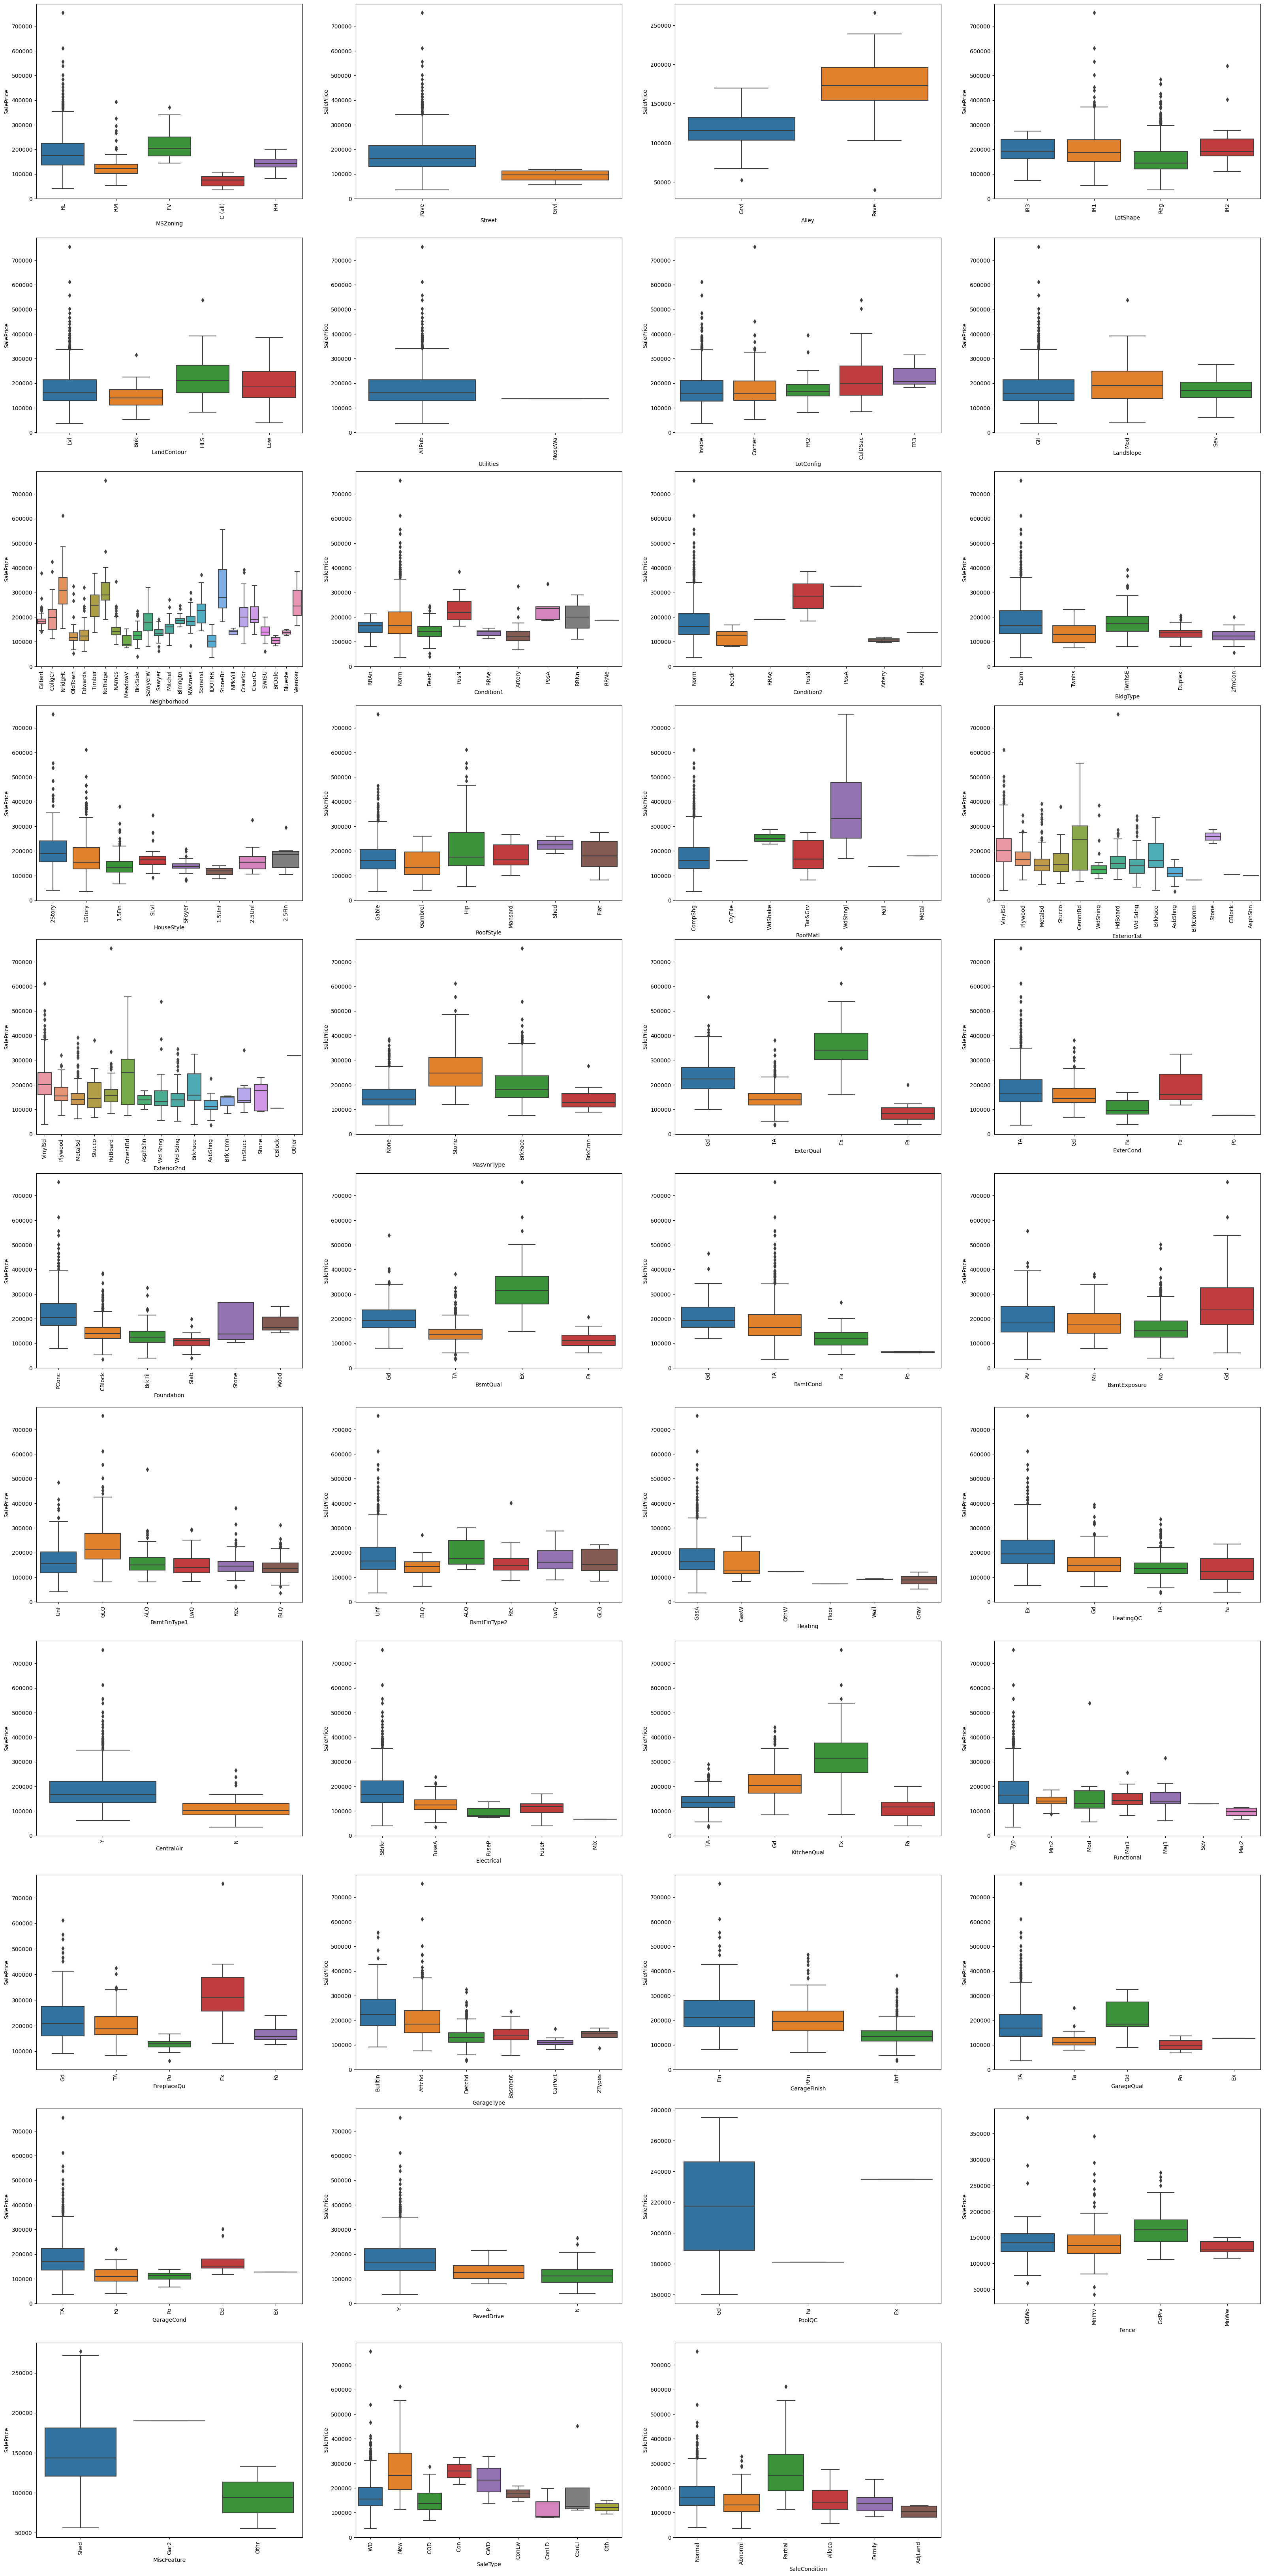

In [14]:
plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    sns.boxplot(x = train[feature], y = y)
    # plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()